# 다차원 텐서 (다차원 배열)

In [1]:
import numpy as np

### 다차원 배열의 계산 복습

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])

add_result = A + B

vec = np.array([1, 2, 3])

add_result2 = A + vec   # 브로드캐스팅

print(add_result)
print(add_result2)

dot_result = A.dot(B.T)
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


### 다차원 배열의 계산으로 순전파 구현

In [11]:
# 입력 데이터
X = np.random.randn(4, 5)   # 4개의 샘플, 5차원 feature

# 가중치
W = np.random.randn(5, 3)   # 5개의 입력(feature), 3개의 뉴런으로 구성된 레이어

# 편향
b = np.random.randn(1, 3)   # 1개의 

# 선형 계산 (W*X + b)
z = np.dot(X, W) + b

# ReLU 활성화 함수
result = np.maximum(0, z)
print(result)

[[0.51700567 0.         1.52694071]
 [4.99347387 0.         0.        ]
 [0.         0.         0.        ]
 [1.381431   0.32411614 0.        ]]


### 다층 퍼셉트론

In [14]:
X = np.random.randn(6, 10)

# 은닉층 : 10개의 입력 -> 8 개의 뉴런
W1 = np.random.randn(10, 8)
b1 = np.random.randn(1, 8)


# 출력층 : 8개의 입력 -> 4 개의 클래스
W2 = np.random.randn(8, 4)
b2 = np.random.randn(1, 4)

# 은닉층 계산 (선형 계산 + tanh 활성화 함수)
z1 = np.dot(X, W1) + b1
result1 = np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성화 함수)
z2 = np.dot(result1,W2) + b2
exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
result2 = exp_z / np.sum(exp_z, axis=1, keepdims=True)

print(result2)

[[9.99946269e-02 1.68430511e-01 6.63024546e-01 6.85503170e-02]
 [1.53820497e-01 3.31952309e-01 4.88309988e-02 4.65396195e-01]
 [9.94657270e-01 1.43080881e-03 1.00748037e-03 2.90444129e-03]
 [5.69923189e-05 7.91038328e-01 1.96706306e-01 1.21983734e-02]
 [2.03916928e-05 9.78807621e-01 2.05395408e-02 6.32446433e-04]
 [9.47924978e-01 1.30516227e-04 1.60881872e-03 5.03356868e-02]]


### 이미지 데이터 예시

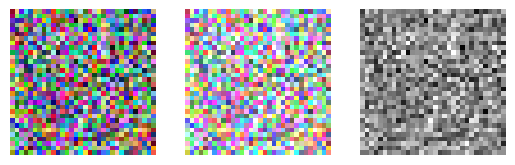

In [55]:
import matplotlib.pyplot as plt

# 이미지 생성
batch_size = 5
channels = 3
height = 32
width = 32

images = np.random.rand(batch_size, channels, height, width)

bright_images = np.clip(images + 0.2, 0, 1)

gray_images = np.mean(images, axis=1)

# Pytorch 프레임워크에서 이미지 데이터를 (채널, 높이 너비) 순서로 지정
# matplolib.pyplot.imshow()는 (높이, 너비, 채널) 순서로 기대
# 따라서 transpose(를 이용해 축의 순서를 재베열)
images_for_display = images[0].transpose(1, 2, 0)  # 축의 인덱스를 변경
bright_images_display = bright_images[0].transpose(1, 2, 0)

plt.subplot(1, 3, 1)
plt.imshow(images_for_display)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(bright_images_display)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(gray_images[0], cmap='gray')
plt.axis("off")

plt.show()